# Module 1 - Introduction to Pandas
## Pandas Part 1

### Introduction

<img src="https://cdn-images-1.medium.com/max/1600/1*9IU5fBzJisilYjRAi-f55Q.png" width=700, height=700>  

- The data manipulation capabilities of pandas are built on top of the numpy library.


#### _Our goals today are to be able to_: <br/>

- Import/read data using Pandas
- Identify Pandas objects and manipulate Pandas objects by index and columns
- Filter data using Pandas

#### _Big questions for this lesson_: <br/>
- Why use Pandas? 
 
 (a) Provides methods able analyze data stored in the format Data Scientist most often encounter (.csv, .tsv, or .xlsx). 
 
 (b) Makes it very convenient to load, process, and analyze in the aforementioned formats. 
 
 (c) Along with python visualization packages allows for the visual analysis of tabular data.
 

- What are the advantages of using Pandas?    
https://stackabuse.com/beginners-tutorial-on-the-pandas-python-library/
- What are the disadvantages of using Pandas?                      
https://wesmckinney.com/blog/apache-arrow-pandas-internals/

### 1. Understanding a PANDAS Framework.
- **Pandas dataframe object represents a spreadsheet with cell values, column names, and row index labels.**

### Two Important data structures in Pandas
- A **Series** is a one-dimensional indexed array of some fixed data type.  
- A **Dataframe** is a two-dimensional data structure like a table where each column contains data of the same type.  
- DataFrames are great for representing real data: rows correspond to instances (examples, observations, etc.), and columns correspond to features of these instances.

####  Example PANDAS DataFrame.

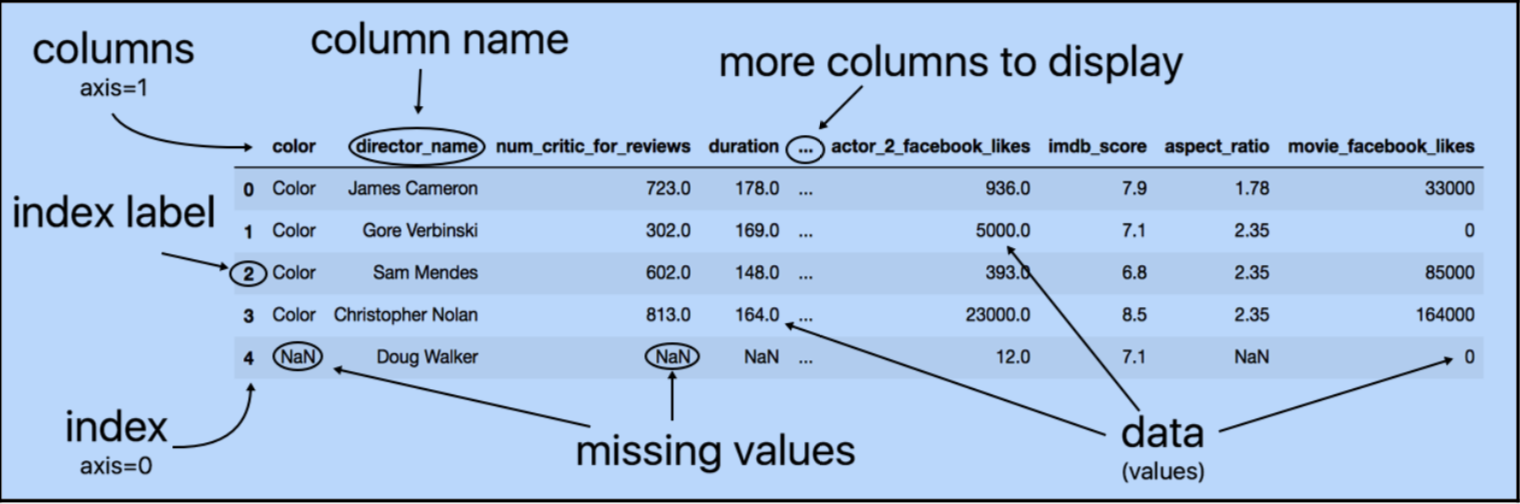

### Observations
- A DataFrame has two axes--a vertical axis (the `index`) and a horizontal axis(the `columns`).  Similar to NumPy uses the integers 0 and 1 when referring to the vertical and horizontal axis, respectively.
- The output for both the `columns` and the `index` is in bold font, which makes them easy to identify. 
- `Index label` and `column name` refer to the individual members of the index and columns, respectively.
- Pandas uses __NaN (not a number)__ to represent missing values.

### 2. Creating PANDAS DataFrame From List and Dictionaries.

In [1]:
import pandas as pd
# Creating DataFrame from Lists
student_info = [('Samantha', '35', 'Houston'),
         ('Alex','17', 'Seattle'),
         ('Dante','26', 'New York')]

labels = ['name', 'age','city']
students_df = pd.DataFrame(student_info, columns=labels)
students_df

name age      city
0  Samantha  35   Houston
1      Alex  17   Seattle
2     Dante  26  New York

In [3]:
# Look at the first n instances from DataFrame.
# Default is n=5
students_df.head()

name age     city
0  Samantha  35  Houston
1      Alex  17  Seattle

In [5]:
# Look at the last n instances from DataFrame.
# Default is n=5
students_df.tail(n=2)

name age      city
1   Alex  17   Seattle
2  Dante  26  New York

In [6]:
#### Creating DataFrame from Dictionaries
student_dict = {
    'name' : ['Samantha', 'Alex', 'Dante'],
    'age' : [35,17,26],
    'city' : ['Houston', 'Seattle', 'New york']
}

students_df = pd.DataFrame(student_dict)

students_df.head()

name  age      city
0  Samantha   35   Houston
1      Alex   17   Seattle
2     Dante   26  New york

In [7]:
# Now that we have created the DataFrame we can examine the data types in the DataFrame
students_df.dtypes

name    object
age      int64
city    object
dtype: object

### 3. Importing and reading data with Pandas!

#### Let's use pandas to read some csv files so we can interact with them.



In [ ]:
# First, let's check which directory we are in so the files we expect to see are there.
!pwd
!ls -a

In [8]:
pd.set_option("display.precision", 2)
example_csv=pd.read_csv('example1.csv')

There is also `read_excel` and many other pandas `read` functions.  
http://pandas.pydata.org/pandas-docs/stable/user_guide/io.html

In [9]:
example_csv.head()

Title1    Title2    Title3
0       one       two     three
1  example1  example2  example3

Try loading in the example file in the directory called 'made_up_jobs.csv' using pandas.

In [13]:
#read in 'made_up_jobs.csv'.
#remember that it's nice to be able to look at your data, so let's do that here, too.
another_example=pd.read_csv('made_up_jobs.csv')
another_example.head()

ID           Name                       Job  Years Employed
0   0   Bob Bobberty  Underwater Basket Weaver              13
1   1   Susan Smells             Salad Spinner               5
2   2  Alex Lastname      Productivity Manager               2
3   3        Rudy P.                Being cool              55
4   4        Rudy G.  Being compared to Rudy P              50

You can also load in data by using the url of an associated dataset.

In [14]:
shelter_data=pd.read_csv('https://data.austintexas.gov/api/views/9t4d-g238/rows.csv?accessType=DOWNLOAD') 
#this link is copied directly from the download option for CSV


Now that we can read in data, let's get more comfortable with our Pandas data structures.

In [15]:
type(shelter_data)

pandas.core.frame.DataFrame

In [16]:
# Now that data is read let's look at it's shape
shelter_data.shape

(108128, 12)

In [17]:
#What are the names of the columns
shelter_data.columns

Index(['Animal ID', 'Name', 'DateTime', 'MonthYear', 'Date of Birth',
       'Outcome Type', 'Outcome Subtype', 'Animal Type', 'Sex upon Outcome',
       'Age upon Outcome', 'Breed', 'Color'],
      dtype='object')

In [18]:
#What are the different data types present in our data
shelter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108128 entries, 0 to 108127
Data columns (total 12 columns):
Animal ID           108128 non-null object
Name                74085 non-null object
DateTime            108128 non-null object
MonthYear           108128 non-null object
Date of Birth       108128 non-null object
Outcome Type        108122 non-null object
Outcome Subtype     49274 non-null object
Animal Type         108128 non-null object
Sex upon Outcome    108125 non-null object
Age upon Outcome    108107 non-null object
Breed               108128 non-null object
Color               108128 non-null object
dtypes: object(12)
memory usage: 9.9+ MB


In [25]:
# We can examine the  particular columns in a data frame.
shelter_data['Name'].head()



0       *Slim
1    *Saffron
2    *Malcolm
3      *River
4     *Kaylee
Name: Name, dtype: object

### 4. Utilizing and identifying Pandas objects

- How are they different from Python lists?

These are questions we will cover in this section. To start, let's start with this list of fruits.

In [26]:
#define your list here!
fruits = ['Apple','Orange','Watermelon','Lemon','Mango']

Using our list of fruits, we can create a pandas object called a 'series' which is much like an array or a vector.

In [27]:
fruits_series = pd.Series(fruits)

One difference between python **list objects** and pandas **series objects** is the fact that you can define the index manually for a **series objects**.

In [28]:
ind = ['a','b','c','d','e']

fruits_series = pd.Series(fruits,index=ind)

fruits_series

a         Apple
b        Orange
c    Watermelon
d         Lemon
e         Mango
dtype: object

### Introduction to manipulation in PANDAS

In [31]:
# Dictionary with list object in values
student_dict = {
    'name    ' : ['Samantha', 'Alex', 'Dante'],
    'age' : [35,17,26],
    'city' : ['Houston', 'Seattle', 'New york']
}

students_df = pd.DataFrame(student_dict)

students_df.head()

name      age      city
0  Samantha   35   Houston
1      Alex   17   Seattle
2     Dante   26  New york

In [32]:
#to find data types of columns
students_df.dtypes

name        object
age          int64
city        object
dtype: object

Let's change the data type of ages to int.

In [34]:
# We can also change a columns type but the change has to make sense.
#students_df.age = students_df.age.astype(int)

#Uncomment line below and observe what happens when trying to convert student's name to int or float
#students_df.name = students_df.name.astype(int)

#How about what happens converting numeric to string
students_df.age = students_df.age.astype(str)

students_df.dtypes

name        object
age         object
city        object
dtype: object

We can also use a custom index for these items. For example, we might want them to be the individual student ID numbers.

In [35]:
school_ids = ['1111','1145','0096']

#Notice here we use pd.DataFrame not pd.Series as we did for a pandas series.
students_df = pd.DataFrame(student_dict,index=school_ids)

students_df.head()

name      age      city
1111  Samantha   35   Houston
1145      Alex   17   Seattle
0096     Dante   26  New york

Using Pandas, we can also rename column names.

In [36]:
students_df.columns = ['NAME', 'AGE','HOME']
students_df.head()

NAME  AGE      HOME
1111  Samantha   35   Houston
1145      Alex   17   Seattle
0096     Dante   26  New york

Or, we can also change the column names using the rename function.

In [37]:
students_df.rename(columns={'AGE': 'YEARS'})

NAME  YEARS      HOME
1111  Samantha     35   Houston
1145      Alex     17   Seattle
0096     Dante     26  New york

In [38]:
# Notice what happens when we print students_df
students_df

NAME  AGE      HOME
1111  Samantha   35   Houston
1145      Alex   17   Seattle
0096     Dante   26  New york

In [39]:
#If you want the file to save over itself, use the option `inplace = True`.
students_df.rename(columns={'AGE': 'YEARS'}, inplace=True)
students_df.head()

NAME  YEARS      HOME
1111  Samantha     35   Houston
1145      Alex     17   Seattle
0096     Dante     26  New york

Similarly, there is a tool to remove rows and columns from your DataFrame

In [40]:
students_df.drop(columns=['YEARS', 'HOME'])

NAME
1111  Samantha
1145      Alex
0096     Dante

In [41]:
#Notice again what happens if we print students_df 
students_df

NAME  YEARS      HOME
1111  Samantha     35   Houston
1145      Alex     17   Seattle
0096     Dante     26  New york

In [42]:
students_df.drop(columns=['YEARS', 'HOME'], inplace=True)
students_df

NAME
1111  Samantha
1145      Alex
0096     Dante

If you want a dataframe to **"save over itself"**, use the option `inplace = True`.

Every function has options. Let's read more about `drop` [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

### 5. Filtering Data Using Pandas
There are several ways to grab particular data from a DataFrame. 
- Python lists allow for selection of data only through integer location. 
- You can use a single integer or slice notation to make the selection but NOT a list of integers.
- Dictionaries only allow selection with a single label. Slices and lists of labels are not allowed.

### DataFrames can be indexed by column name (label) or row name (index) or by position.   
#### The `.loc` method is used for indexing by name.  
#### While `.iloc` is used for indexing by number.

In [43]:
student_dict = {
    'name' : ['Samantha', 'Alex', 'Dante'],
    'age' : ['35','17','26'],
    'city' : ['Houston', 'Seattle', 'New york']
}

students_df = pd.DataFrame(student_dict) 

In [44]:
students_df

name age      city
0  Samantha  35   Houston
1      Alex  17   Seattle
2     Dante  26  New york

### Let's take a look at `.iloc`
#### `.iloc` takes slices based on index position.
#### `.iloc` stands for integer location so that should help with remember what it does.
#### `.iloc`[row , column].

In [45]:
#returns the first row
students_df.iloc[0] 

name    Samantha
age           35
city     Houston
Name: 0, dtype: object

In [46]:
#returns the first column
students_df.iloc[:,0] 

0    Samantha
1        Alex
2       Dante
Name: name, dtype: object

In [47]:
#returns first two rows notice that ILOC performs regular python slicing.
students_df.iloc[0:2] 

name age     city
0  Samantha  35  Houston
1      Alex  17  Seattle

In [48]:
#returns the first two columns
students_df.iloc[:,0:2] 

name age
0  Samantha  35
1      Alex  17
2     Dante  26

In [ ]:
# returns first row and columns 1 and 2
students_df.iloc[0:1,0:2] 

### How would we use `.iloc` to return the last row?


In [49]:
#return the last row using iloc
students_df.iloc[-1]

name       Dante
age           26
city    New york
Name: 2, dtype: object

### How would we use `.iloc` to return the last column?


In [50]:
#return the last column using iloc
students_df.iloc[:,-1]

0     Houston
1     Seattle
2    New york
Name: city, dtype: object

### What if we only want certain columns or rows?

In [52]:
# Don't do 
#students_df.iloc[0, 2]
students_df.iloc[[0,2]]

name age      city
0  Samantha  35   Houston
2     Dante  26  New york

In [53]:
students_df.iloc[:,[0,2]]

name      city
0  Samantha   Houston
1      Alex   Seattle
2     Dante  New york

### Let's take a look at `.loc`
#### Label based method. 
#### Names or labels of the index is used when taking slices.
#### Also supports boolean subsetting.

In [71]:
# We will use loc to return rows and columns based on labels. 
# Let's look at the students_df DataFrame again.
student_dict = {
    'name' : ['Samantha', 'Alex', 'Dante', 'Samantha'],
    'age' : ['35','17','26','30'],
    'city' : ['Houston', 'Seattle', 'New york','Atlanta']
}

students_df = pd.DataFrame(student_dict)

students_df.head()

name age      city
0  Samantha  35   Houston
1      Alex  17   Seattle
2     Dante  26  New york
3  Samantha  30   Atlanta

In [72]:
#returns the student information associated with index 0
students_df.loc[0]

name    Samantha
age           35
city     Houston
Name: 0, dtype: object

In [73]:
#returns the student information for row index 0 to 2 inclusive.
#note iloc would return normal python slicing not including 2 as demonstrated above.
students_df.loc[0:2] 

name age      city
0  Samantha  35   Houston
1      Alex  17   Seattle
2     Dante  26  New york

In [74]:
#returns the column labeled 'age'
students_df.loc[:,'age'] 

0    35
1    17
2    26
3    30
Name: age, dtype: object

In [75]:
#returns the column labeled 'age' and index values 1 to 2.
#gives us the values of the rows with index from 1 to 2 (inclusive)
#and columns labeled age"
students_df.loc[1:2,'age'] 

1    17
2    26
Name: age, dtype: object

In [76]:
#returns the column labeled 'age' and index values 1 to 2.
#gives us the values of the rows with index from 1 to 2 (inclusive)
#and columns labeled age to city (inclusive)"
students_df.loc[1:2,'age':'city'] 

age      city
1  17   Seattle
2  26  New york

In [77]:
#What should we get?
students_df.loc[0:1,['name','city']]

name     city
0  Samantha  Houston
1      Alex  Seattle

In [78]:
students_df.loc[:,'name']

0    Samantha
1        Alex
2       Dante
3    Samantha
Name: name, dtype: object

In [79]:
#How about? 
students_df.loc[[0,2],['name','city']] 

name      city
0  Samantha   Houston
2     Dante  New york

In [86]:
#what happens if we rearrange index
school_ids = ['5','11','3','404']
students_df = pd.DataFrame(student_dict,index=school_ids)

In [81]:
students_df

name age      city
0  Samantha  35   Houston
1      Alex  17   Seattle
2     Dante  26  New york
3  Samantha  30   Atlanta

In [87]:
#What should we get now?
students_df.loc[[0,2],['name', 'city']]

KeyError: "None of [Int64Index([0, 2], dtype='int64')] are in the [index]"

In [88]:
#What should we get now?
students_df.loc[['5','11'],['name', 'city']]

name     city
5   Samantha  Houston
11      Alex  Seattle

In [89]:
students_df.set_index("name", inplace=True)
students_df

age      city
name                  
Samantha  35   Houston
Alex      17   Seattle
Dante     26  New york
Samantha  30   Atlanta

In [90]:
students_df.loc[['Samantha']]

age     city
name                 
Samantha  35  Houston
Samantha  30  Atlanta

In [91]:
#Subsetting nonconsecutive rows
students_df.loc[['Samantha','Dante']]

age      city
name                  
Samantha  35   Houston
Samantha  30   Atlanta
Dante     26  New york

In [ ]:
#Samantha to the end
students_df.loc['Samantha':]

### Boolean Subsetting

In [92]:
student_dict = {
    'name' : ['Samantha', 'Alex', 'Dante','Samantha'],
    'age' : ['35','17','26','21'],
    'city' : ['Houston', 'Seattle', 'New york','Atlanta'],
    'state' :['Texas', 'Washington','New York','Georgia']
}

students_df = pd.DataFrame(student_dict) 

In [99]:
#The statement data[‘name’] == ‘Samantha’] produces a Pandas Series with a True/False value for every row 
#in the ‘data’ DataFrame, where there are “True” values for the rows where the name is “Samantha”. 
#These type of boolean arrays can be passed directly to the .loc indexer.
students_df.loc[students_df['name']=='Samantha']

name age     city    state
0  Samantha  35  Houston    Texas
3  Samantha  21  Atlanta  Georgia

In [100]:
students_df

name age      city       state
0  Samantha  35   Houston       Texas
1      Alex  17   Seattle  Washington
2     Dante  26  New york    New York
3  Samantha  21   Atlanta     Georgia

In [102]:
#What about if we only want the city and state of the selected students with the name Samantha?
students_df.loc[students_df['name']=='Samantha',['city','state']]

city    state
0  Houston    Texas
3  Atlanta  Georgia

In [101]:
#What amount if we want to select a student of a specific age? 
students_df.loc[students_df['age']=='21']

name age     city    state
3  Samantha  21  Atlanta  Georgia

In [105]:
#What amount if we want to select a student of a specific age? 
students_df.loc[(students_df['age']=='21') | (students_df['city']=='Atlanta')]

name age     city    state
3  Samantha  21  Atlanta  Georgia

In [107]:
#What should be returned? 
students_df.loc[(students_df['age']=='35') | (students_df['city']=='Atlanta')]

name age     city    state
0  Samantha  35  Houston    Texas
3  Samantha  21  Atlanta  Georgia

### Lesson Recap
Pandas combines the power of python lists (selection via integer location) and dictionaries (selection by label)

`.iloc` is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array.

`.iloc` will raise IndexError if a requested indexer is out-of-bounds, except slice indexers which allow out-of-bounds indexing (this conforms with python/numpy slice semantics).

`.loc` is primarily label based, but may also be used with a boolean array.

#### Warning Note that contrary to usual python slices, both the start and the stop are included.

`.loc` will raise a keyError when any items are not found.

### Pandas
- The data structures in Pandas are implemented using series and dataframe classes.  
- A series is a one-dimensional indexed array of some fixed data type.  
- While a dataframe is a two-dimensional data structure like a table where each column contains data of the same type.  
- DataFrames are great for representing real data: rows correspond to instances (examples, observations, etc.), and columns correspond to features of these instances.

### CLASS ASSIGNMENT
Now that we have all of these new tools in our tool belt, use these tools on the shelter data set! 

In [ ]:
import pandas as pd
shelter_data=pd.read_csv('https://data.austintexas.gov/api/views/9t4d-g238/rows.csv?accessType=DOWNLOAD') 
shelter_data.head()

## Assessment & Reflection

- One thing you did not know before?
- Two things you want to remember?
- One thing you're still confused by?